In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, cross_validate

In [2]:
diabetes_df = pd.read_csv('latest_diabetes.csv')
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
diabetes_df.shape

(768, 9)

In [4]:
diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# Store features in X and dependent variable 'Outcome' in y
X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
scaler = StandardScaler()
scaler.fit(X)
standard_data = scaler.fit_transform(X)
X = standard_data

In [9]:
#SPlit data into train and test data 75% training data, 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 1)

In [10]:
X_train.shape

(576, 8)

In [11]:
X_test.shape

(192, 8)

In [12]:
svc = svm.SVC(kernel = 'linear')

svc.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
train_y_pred = svc.predict(X_train)
test_y_pred = svc.predict(X_test)

In [14]:
print("Train set accuracy:", accuracy_score(y_train, train_y_pred))
print("Test set accuracy:", accuracy_score(y_test, test_y_pred))

Train set accuracy: 0.7777777777777778
Test set accuracy: 0.78125


In [18]:
#input_data = ([[0, 80, 60, 20, 0, 20.0, 0.2, 25]])
#input_data = (10, 101, 76, 48, 180,	32.9, 0.171, 63)
input_data = (8, 183, 64, 0, 0, 23.3, 0.672, 32)
np_arry_data = np.asarray(input_data)
reshape_data = np_arry_data.reshape(1, -1)

scaled_data = scaler.transform(reshape_data)

prediction = svc.predict(scaled_data)

print(f"Prediction Value: {prediction[0]}")
if prediction == 1:
    print("This person has diabetes")
else:
    print("This person has no diabetes")

Prediction Value: 1
This person has diabetes


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
decision_value =  svc.decision_function(scaled_data)
print(f"Decision value: {decision_value}")


In [19]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
model_results = {}

models = {
    'SVC': svc,
    'Random Forest': RandomForestClassifier(random_state = 1),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 1),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state = 1),
    'Logistic Regression': LogisticRegression(random_state = 1, max_iter = 1000),
    'Neural Network': MLPClassifier(random_state = 1, max_iter = 1000),
    'XGBoost': xgb.XGBClassifier(objective = 'binary:logistic', random_state = 1)
}

for name, model in models.items():
    if name != 'SVC': 
        model.fit(X_train, y_train)

    #predictions
    y_pred = model.predict(X_test)

    #Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy

    print(f"{name} Test Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")



SVC Test Accuracy: 0.7812
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       123
           1       0.74      0.61      0.67        69

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192

Confusion Matrix: 
[[108  15]
 [ 27  42]]

Random Forest Test Accuracy: 0.8073
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       123
           1       0.78      0.65      0.71        69

    accuracy                           0.81       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192

Confusion Matrix: 
[[110  13]
 [ 24  45]]

Gradient Boosting Test Accuracy: 0.7812
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86 

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Test Accuracy: 0.8073
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       123
           1       0.74      0.71      0.73        69

    accuracy                           0.81       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192

Confusion Matrix: 
[[106  17]
 [ 20  49]]

XGBoost Test Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       123
           1       0.66      0.64      0.65        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192

Confusion Matrix: 
[[100  23]
 [ 25  44]]



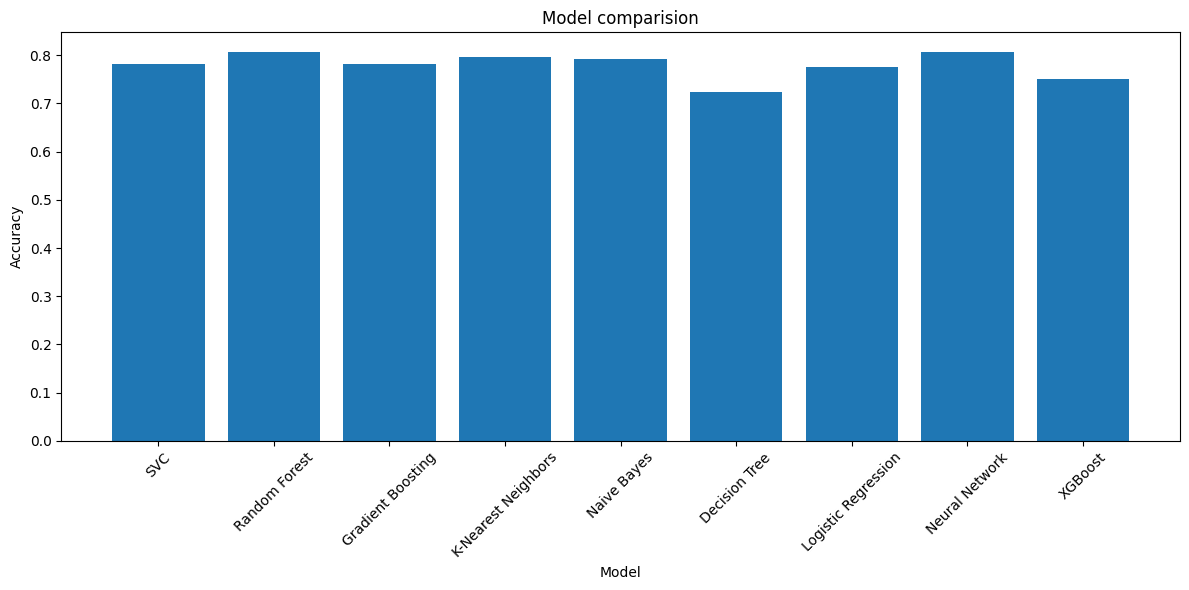

In [27]:
plt.figure(figsize = (12, 6))
plt.bar(model_results.keys(), model_results.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model comparision')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

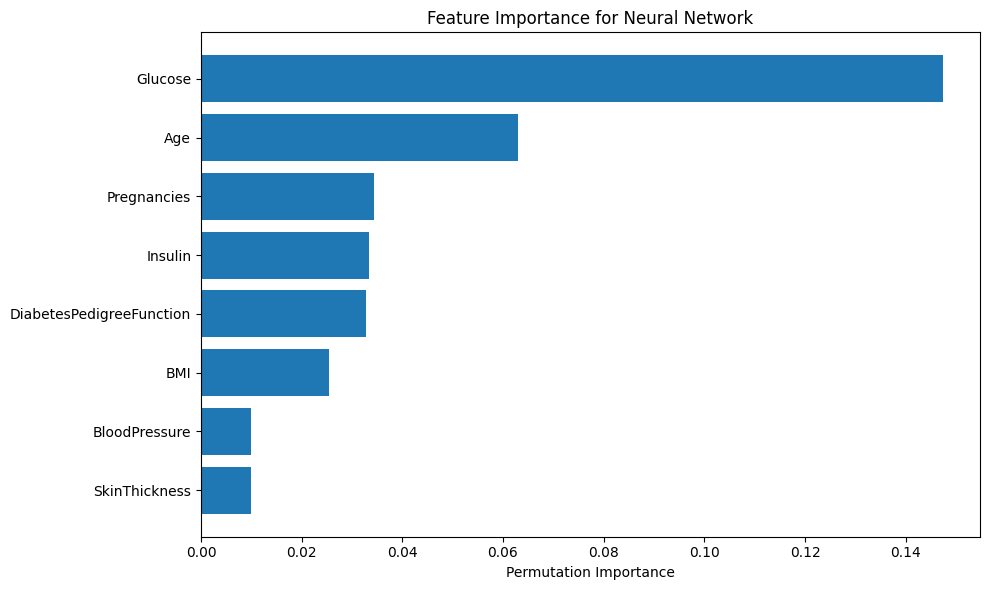

In [49]:
#Feature Importance Analysis

nn_model = models['Neural Network']

result = permutation_importance(nn_model, X_test, y_test, n_repeats = 10, random_state=1)
importance = result.importances_mean

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',	
                 'BMI',	'DiabetesPedigreeFunction',	'Age']

plt.figure(figsize = (10,6))
sorted_idx = np.argsort(importance)
plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for Neural Network')
plt.tight_layout()
plt.show()


In [46]:
from sklearn.model_selection import KFold
k_folds = 5
kf = KFold(n_splits = k_folds , shuffle=True, random_state = 1)

cv_results = {}

scoring = ['accuracy', 'precision', 'recall', 'f1']

for name, model in models.items():
    # Run cross-validation
    results = cross_validate(model, X, y, cv=kf, scoring=scoring)
    
    # Store results
    cv_results[name] = {
        'Accuracy': results['test_accuracy'].mean(),
        'Accuracy_std': results['test_accuracy'].std(),
        'Precision': results['test_precision'].mean(),
        'Recall': results['test_recall'].mean(),
        'F1': results['test_f1'].mean()
    }
    
    # Print results for this model
    print(f"\nK-Fold Cross-Validation Results for {name}:")
    print(f"Accuracy: {results['test_accuracy'].mean():.4f} ± {results['test_accuracy'].std():.4f}")
    print(f"Precision: {results['test_precision'].mean():.4f}")
    print(f"Recall: {results['test_recall'].mean():.4f}")
    print(f"F1 Score: {results['test_f1'].mean():.4f}")

# Convert results to a DataFrame for easier comparison
cv_df = pd.DataFrame.from_dict(cv_results, orient='index')
print("\nCross-Validation Summary for All Models:")
print(cv_df)




K-Fold Cross-Validation Results for SVC:
Accuracy: 0.7696 ± 0.0165
Precision: 0.7142
Recall: 0.5676
F1 Score: 0.6323

K-Fold Cross-Validation Results for Random Forest:
Accuracy: 0.7617 ± 0.0293
Precision: 0.6913
Recall: 0.5788
F1 Score: 0.6293

K-Fold Cross-Validation Results for Gradient Boosting:
Accuracy: 0.7695 ± 0.0281
Precision: 0.6931
Recall: 0.6167
F1 Score: 0.6516

K-Fold Cross-Validation Results for K-Nearest Neighbors:
Accuracy: 0.7435 ± 0.0326
Precision: 0.6567
Recall: 0.5589
F1 Score: 0.6034

K-Fold Cross-Validation Results for Naive Bayes:
Accuracy: 0.7579 ± 0.0198
Precision: 0.6710
Recall: 0.6013
F1 Score: 0.6336

K-Fold Cross-Validation Results for Decision Tree:
Accuracy: 0.7006 ± 0.0267
Precision: 0.5790
Recall: 0.5456
F1 Score: 0.5603

K-Fold Cross-Validation Results for Logistic Regression:
Accuracy: 0.7695 ± 0.0175
Precision: 0.7159
Recall: 0.5644
F1 Score: 0.6308

K-Fold Cross-Validation Results for Neural Network:
Accuracy: 0.7578 ± 0.0275
Precision: 0.6668
Rec

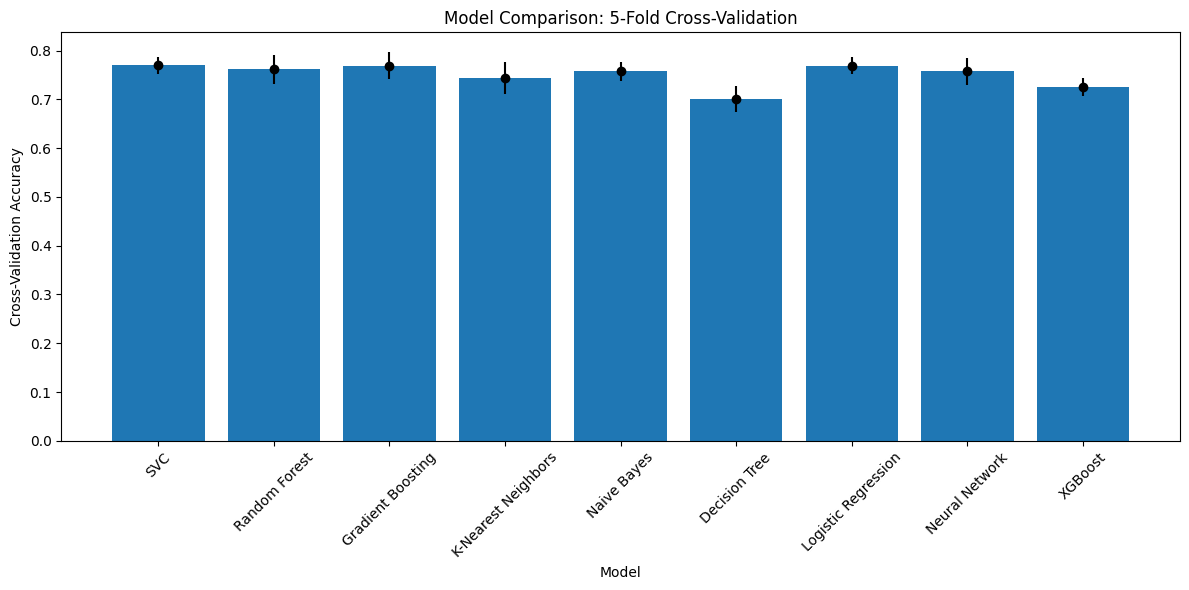

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(cv_df.index, cv_df['Accuracy'])
plt.errorbar(cv_df.index, cv_df['Accuracy'], yerr=cv_df['Accuracy_std'], fmt='o', color='black')
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Comparison: 5-Fold Cross-Validation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()